# A toy problem: implement training a Support Vector Machine with SGD

Antonio G. Quintela

## SVM

Support Vectors Machines are generalizations of linear decision boundaries for linearly nonseparable cases. It is an optimization based algorithm based on the idea of soft constraint optimization in which nondesirable decisions are penalized following a cost function.
Depending on the loss function, the optimization problem could be a convex optimization problem. That convex optimization problems are highly interesting for machine learning because of simplicity and the quantity of possiblities we have to optimize it.

The case of the SVM we have a linear model that we can define as:

$$f(x) = x^Tw + w_0$$

and we can do predictions in the binary classification by applying $sign$ function,

$$y_{pred} = sign(x^Tw + w_0)$$

The margin can be defined as $m(w) = y\cdot (x^Tw + w_0)$. If $m > 0$ it is the margin safety by which f(x) is correct. If $m < 0$ then $m$ is a measure of the margin by which f(x) is wrong.

The problem could be defined in the form,

$$w = \underset{w}{\mathrm{argmin}} \quad \mathbb{L}(w)$$

The part of the cost it could be composed for different terms. The term represented the loss and a term to penalize high weight parameters, called regularization. The term of the cost can be descomposed by the samples allowing us to apply SGD.

$$ \mathbb{L}(w) = \sum_{i=0}^{n\_samp}\ell(m_t(w)) + \frac{\lambda}{2} \| w \|^2$$


We could say that this optimization problem is a SVM when $\ell(m_t(w))$ is a Hinge loss function.

## Hinge Loss

Hinge loss is the function used to define the margin optimization. 

$${\displaystyle \ell(y) = \max(0, 1-y_{pred} \cdot y)}$$

The interesting of Hinge is that is a convex function. It is not differenciable but its gradient with respect the weight parameters can be analytical expressed in a two part function in which,

$${\frac {\partial \ell }{\partial w_{i}}}={\begin{cases}-y_{pred}\cdot x_{i}&{\text{if }}y_{pred}\cdot y<1\\0&{\text{otherwise}}\end{cases}}$$


## Stochastic Gradient Descent

Stochastic Gradient Descent or SGD for short is an iterative Gradient Descent in which it is used some parts of the sample to optimize locally using the gradient of the curve in a given point of the parameter space trying to find the maxima or the minima.


$${\displaystyle w:=w-\eta \nabla L_{i}(w)}$$

in which $\eta$ is the learning rate.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ml_techniques.svm import SVM

In [3]:
## Apply test to the code
%run tests.tests.py

ERROR:root:File `u'tests.tests.py'` not found.


### Load data

In [4]:
data = np.loadtxt('data/features.txt', delimiter=',')
target = np.loadtxt('data/target.txt', delimiter=',')

### Function definitions

In [5]:
def weights_histogram(solver):
    title = r'Histogram of the distribution of weight values '
    title += r'($\eta=0.0001$, $\lambda=1.$, $b_s={}$)'.format(solver.batch_size)
    fig = plt.figure(figsize=(10, 5))
    _ = plt.hist(solver.model.w, bins=20)
    _ = plt.title(title)
    _ = plt.xlabel('weights')
    _ = plt.ylabel('Counts')
    return fig

In [6]:
def losses_accross_training(solver):
    title = r'Loss through epochs of SGD '
    title += r'($\eta=0.0001$, $\lambda=1.$, $b_s={}$)'.format(solver.batch_size)
    fig = plt.figure(figsize=(14, 6))
    plt.xlim([0, len(solver.train_loss_history)])
    _ = plt.plot(solver.train_loss_history, 'b--', label='train_loss')
    _ = plt.plot(solver.test_loss_history, 'r-', label='test_loss')
    _ = plt.title(title)
    _ = plt.xlabel("epochs")
    _ = plt.ylabel("Loss")
    legend = plt.legend(loc='upper right')
    return fig

In [7]:
def acc_accross_training(solver):
    title = r'Accuracy through epochs of SGD '
    title += r'($\eta=0.0001$, $\lambda=1.$, $b_s={}$)'.format(solver.batch_size)
    fig = plt.figure(figsize=(14, 6))
    plt.xlim([0, len(solver.train_accuracy_history)])
    _ = plt.plot(solver.train_accuracy_history, 'b--', label='train_loss')
    _ = plt.plot(solver.test_accuracy_history, 'r-', label='test_loss')
    _ = plt.title(title)
    _ = plt.xlabel("epochs")
    _ = plt.ylabel("Accuracy")
    legend = plt.legend(loc='lower right')
    return fig

## Study with batch_size=1

In [8]:
solver = SVM(n_epochs=1000, batch_size=1, learning_rate=0.0001)
solver = solver.fit(data[:-1000], target[:-1000], data[-1000:], target[-1000:])

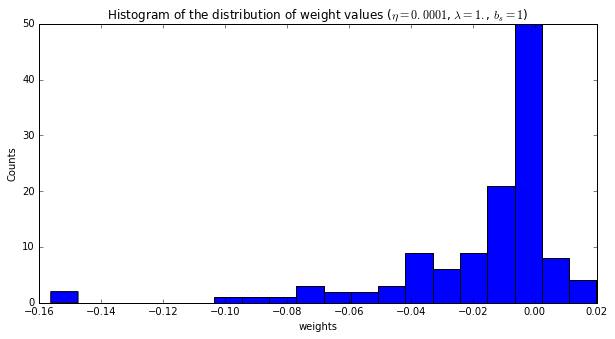

In [9]:
weights_histogram(solver)

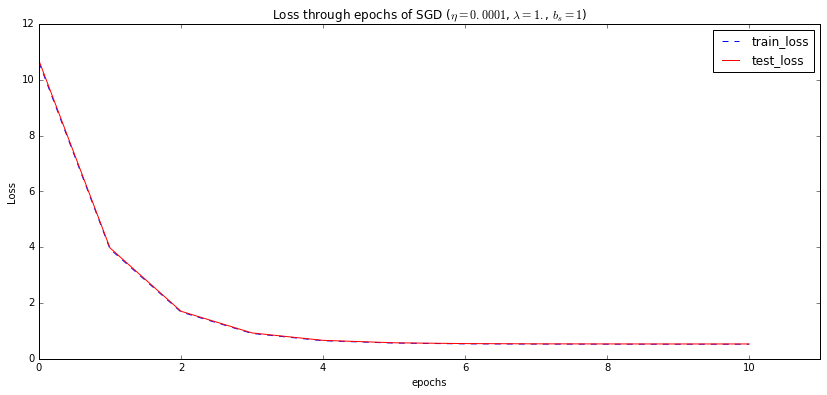

In [10]:
losses_accross_training(solver)

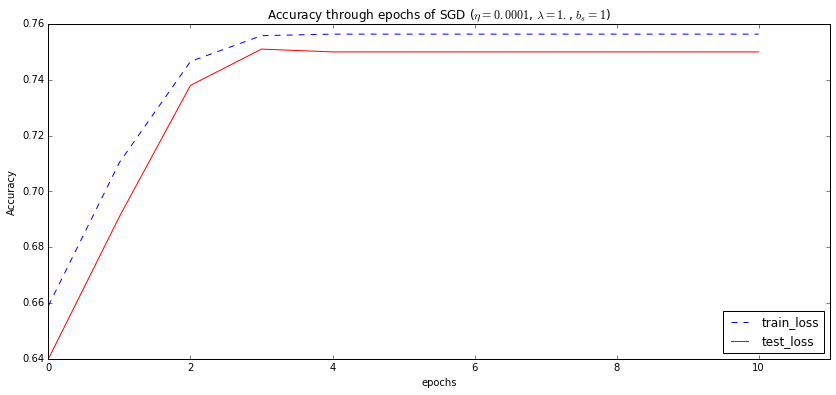

In [11]:
acc_accross_training(solver)

In [12]:
solver.report_results()

learning_rate = 0.0001
regularization = 1.00
batch_size = 1
time expended: 0.00s
num. epochs: 11
best epoch acc: 3
accuracy train: 0.7558
accuracy test: 0.7510



## Study with batch_size=10

In [13]:
solver = SVM(n_epochs=1000, batch_size=10, learning_rate=0.0001)
solver = solver.fit(data[:-1000], target[:-1000], data[-1000:], target[-1000:])

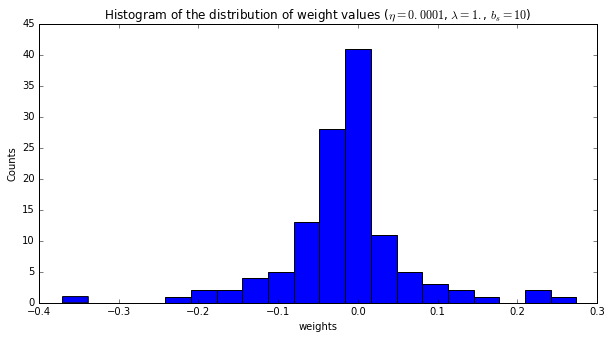

In [14]:
weights_histogram(solver)

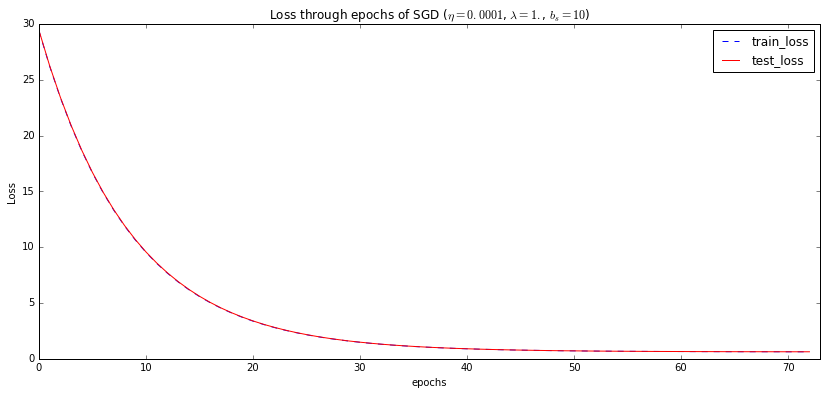

In [15]:
losses_accross_training(solver)

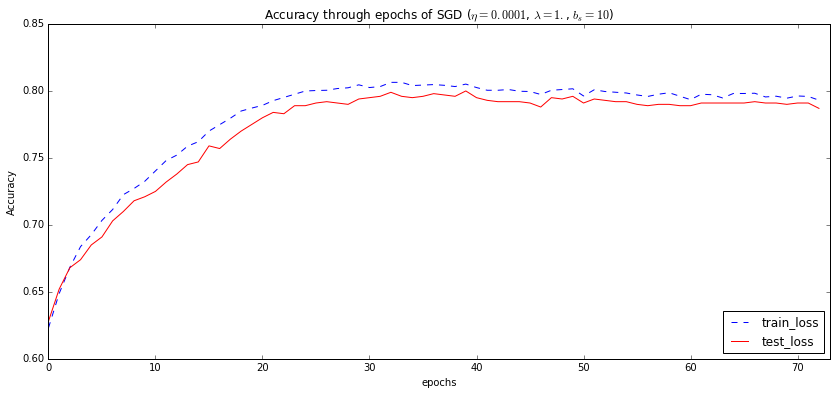

In [16]:
acc_accross_training(solver)

In [17]:
solver.report_results()

learning_rate = 0.0001
regularization = 1.00
batch_size = 10
time expended: 0.00s
num. epochs: 73
best epoch acc: 39
accuracy train: 0.8051
accuracy test: 0.8000



## Study with batch_size=100

In [18]:
solver = SVM(n_epochs=1000, batch_size=100, learning_rate=0.0001)
solver = solver.fit(data[:-1000], target[:-1000], data[-1000:], target[-1000:])

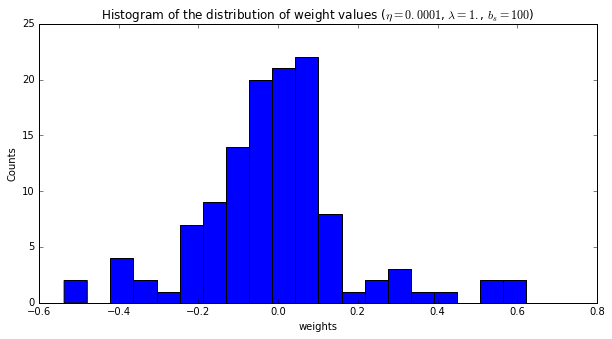

In [19]:
weights_histogram(solver)

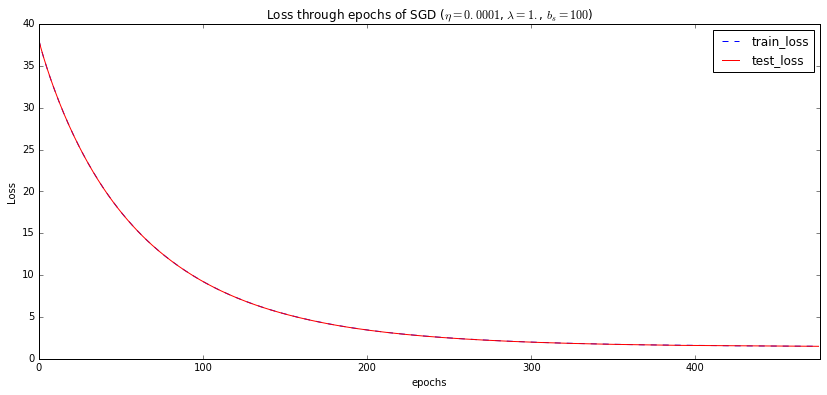

In [20]:
losses_accross_training(solver)

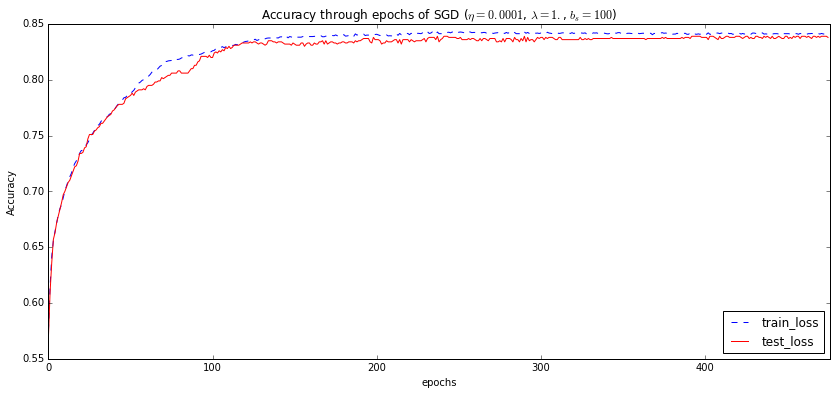

In [21]:
acc_accross_training(solver)

In [22]:
solver.report_results()

learning_rate = 0.0001
regularization = 1.00
batch_size = 100
time expended: 0.00s
num. epochs: 476
best epoch acc: 237
accuracy train: 0.8428
accuracy test: 0.8390



## Comments

The results are self-conclusives. Quicker convergence for smaller batch size but lower accuracy reached. On the other hand, for higher batch_size, you need more epochs to converge but reach higher accuracy.


## Comments about the code

The code has lack of completitude. The design is open to new improvements that are not in the code because of the lack of time and the purpose of that exercise.

There are several improvements over that code design. From control values of the step in order to keep numerical stability (it could be certain regions with huge slope, due to the nonderivative property of Hinge in certain points of the parameter space.
Also we can make dynamic learning step in order to skip quickly uninteresting places of the loss landscape and put more effort in exploring the interesting ones.

If we would desire to use different optimizers probably it had been better to keep separated the optimizer and the model.